## Introduction

Online orders from the Chipotle restaurant chain

##### What Questions Are We Trying To Answer? 
- What is the number of observations in the dataset?
- What is the number of columns in the dataset?
- Which was the most-ordered item?
- For the most-ordered item, how many items were ordered?
- What was the most ordered item in the choice_description column?
- How many items were orderd in total?
- How much was the revenue for the period in the dataset?
- How many orders were made in the period?
- What is the average revenue amount per order?
- How many different items are sold?

In [7]:
# Import necessary libraries for initial data understanding, visualisations and exploratory data analysis
import pandas  as pd
import numpy   as np
#For Visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [8]:
# reads the data from the file - denotes as CSV, it has no header row, sets column headers
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv',sep = '\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


>Now let's take our first look at the data

### Assess Data Quality

Examine the quality of the data, addressing questions such as:

    Is the data complete (does it cover all the cases required)?
    Is it correct, or does it contain errors and, if there are errors, how common are they?
    Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?


In [32]:
df.sample(10)

,order_id,quantity,item_name,choice_description,item_price
3225,1290,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",$8.49
1992,805,1,Chips and Tomatillo Red Chili Salsa,NaN,$2.95
3505,1408,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$10.98
2796,1110,1,Chips and Fresh Tomato Salsa,NaN,$2.95
210,93,1,Veggie Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$11.25
804,331,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",$9.25
1003,412,1,Bottled Water,NaN,$1.50
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
3165,1264,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
621,256,1,Chicken Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$10.98


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


>Show me the shape of the data

In [11]:
df.shape[0] # our sample size

4622

In [12]:
# Show me the complete column list
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [13]:
#Show me the number of unique values
df.nunique()

order_id              1834
quantity                 9
item_name               50
choice_description    1043
item_price              78
dtype: int64

In [16]:
#Show me the number of duplicated values
sum(df.duplicated())

59

In [18]:
sum(df.order_id.duplicated())

2788

In [19]:
sum(df.quantity.duplicated())

4613

In [20]:
sum(df.item_name.duplicated())

4572

In [21]:
sum(df.item_price.duplicated())

4544

In [22]:
sum(df.choice_description.duplicated())

3578

In [23]:
#Show me the number of missing values
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

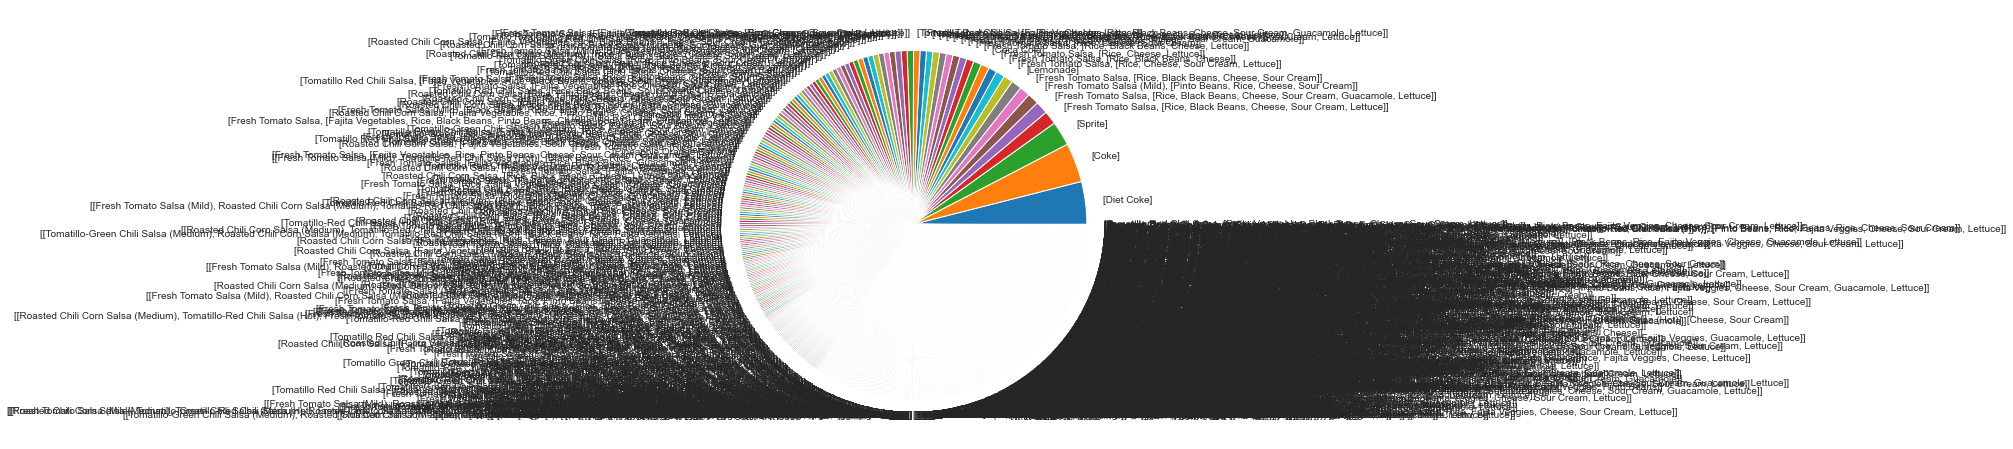

In [37]:
df['choice_description'].value_counts().plot(kind = 'pie',figsize = (8,8));


####  Quality
Missing Data

In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem


#### Options

    We may want to remove null rows entirely from the dataset. To do so we would run something like the following

In [35]:
df.dropna(subset=['choice_description'] , inplace = True)

#### Test

In [36]:
df.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

In [ ]:
df.shape[0]


##### Duplicates

There may be duplicates in the data. However, these may be legitimate new rows depending on the structure of the data. We need to discover them, then decide what to do with them


in this project, we will not drop any duplicates

## Explore the data

 - How is the dataset indexed?

In [49]:
df.index

Int64Index([   1,    2,    4,    5,    7,    8,    9,   11,   12,   13,
            ...
            4609, 4610, 4611, 4612, 4615, 4617, 4618, 4619, 4620, 4621],
           dtype='int64', length=3376)

- Which was the most-ordered item?

In [43]:
df.head(1)

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39


In [54]:
df['item_name'].value_counts().sort_values(ascending = False).head(5)

Chicken Bowl         726
Chicken Burrito      553
Steak Burrito        368
Canned Soft Drink    301
Steak Bowl           211
Name: item_name, dtype: int64

In [71]:
df.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

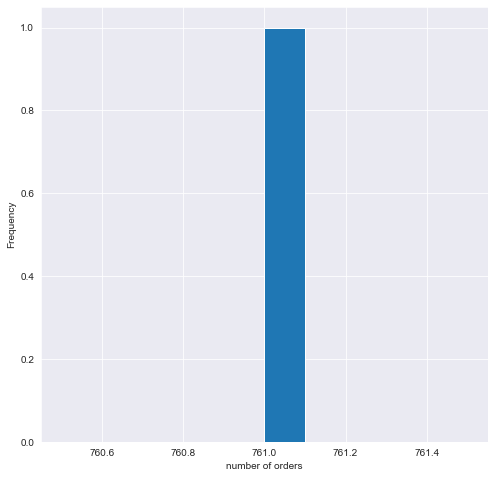

In [75]:
df.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(1).plot(kind = 'hist',figsize=(8,8));
plt.xlabel('number of orders');

 -  What was the most ordered item in the choice_description column?

In [140]:
df.groupby('choice_description').sum().sort_values(by=['quantity'] , ascending=False).head(1)

,order_id,quantity,item_price,revenue
choice_description,,,,
[Diet Coke],123455,159,284.0,352.0


 - How many items were orderd in total?

In [88]:
df.quantity.sum()

3590

- Turn the item price into a float

In [90]:
df.item_price.dtypes

dtype('O')

In [92]:
df.item_price = df.item_price.str.extract('(\d+)').astype(float)

In [93]:
df.item_price.dtypes

dtype('float64')

- How much was the revenue for the period in the dataset?

In [128]:
revenue = (df['quantity'] * df['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $31705.0


- How many orders were made in the period?

In [100]:
df['order_id'].count()

3376

In [126]:
df['order_id'].value_counts().count()

1833

- What is the average revenue amount per order?

In [117]:

df['revenue'] = df['quantity'] * df['item_price']
order_grouped = df.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']


17.296781232951446

- How many different items are sold?

In [114]:
df['item_name'].value_counts()#get the value then count it

Chicken Bowl             726
Chicken Burrito          553
Steak Burrito            368
Canned Soft Drink        301
Steak Bowl               211
Chicken Soft Tacos       115
Chicken Salad Bowl       110
Canned Soda              104
Veggie Burrito            95
Barbacoa Burrito          91
Veggie Bowl               85
Carnitas Bowl             68
Barbacoa Bowl             66
Carnitas Burrito          59
Steak Soft Tacos          55
6 Pack Soft Drink         54
Chicken Crispy Tacos      47
Carnitas Soft Tacos       40
Steak Crispy Tacos        35
Steak Salad Bowl          29
Nantucket Nectar          27
Barbacoa Soft Tacos       25
Izze                      20
Veggie Salad Bowl         18
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Chicken Salad              9
Carnitas Crispy Tacos      7
Veggie Soft Tacos          7
Carnitas Salad Bowl        6
Burrito                    6
Veggie Salad               6
Steak Salad                4
Bowl                       2
Crispy Tacos  

In [113]:
df['item_name'].count()#get the number of rows

3376

In [115]:
df['item_name'].value_counts().count()

38